In [1]:
using PyPlot

push!(LOAD_PATH, pwd())
using Coils
using CoilsPlot

# Introduction

The coil design method works on a predefined grid. The grid is defined by a set of points in space (`vertices`) and a directed graph `g` defining which are connected with one another. A connection between two vertices means, that a wire of a coil can be laid in a straight line between them.

It is absolutely possible to supply `vertices` (an array of arrays of x, y, z coordinates) and the graph manually. There is also fuction `cuboid_system` that defines a cuboid system, given it size (x, y and z) and the number of tiles along x, y and z directions.

In [2]:
g, vertex_positions = cuboid_system([1, 1, 1], [3, 3, 3])

({56, 108} directed simple Int64 graph, Any[[-0.5, -0.5, -0.5], [-0.166667, -0.5, -0.5], [0.166667, -0.5, -0.5], [0.5, -0.5, -0.5], [-0.5, -0.166667, -0.5], [-0.166667, -0.166667, -0.5], [0.166667, -0.166667, -0.5], [0.5, -0.166667, -0.5], [-0.5, 0.166667, -0.5], [-0.166667, 0.166667, -0.5]  …  [0.166667, -0.166667, 0.5], [0.5, -0.166667, 0.5], [-0.5, 0.166667, 0.5], [-0.166667, 0.166667, 0.5], [0.166667, 0.166667, 0.5], [0.5, 0.166667, 0.5], [-0.5, 0.5, 0.5], [-0.166667, 0.5, 0.5], [0.166667, 0.5, 0.5], [0.5, 0.5, 0.5]])

In `CoilsPlot` there is a number of functions for plotting the objects.

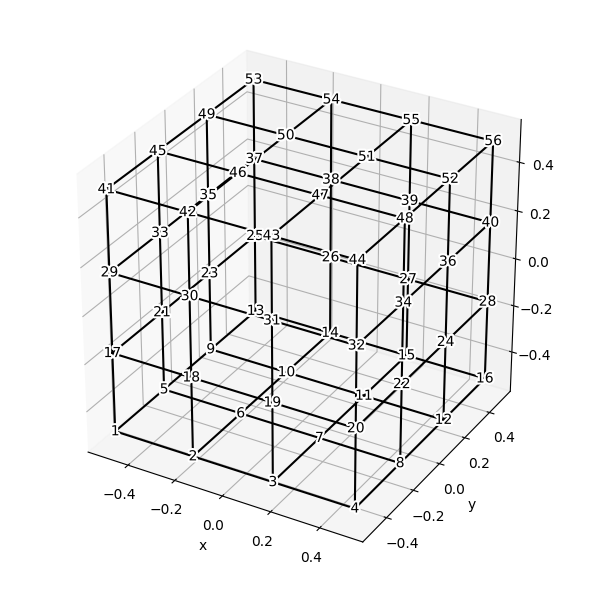

In [3]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions)
plot_edges(g, vertex_positions, standalone = false)

The method optimizes the field in a finite set of Points Of Interest (`poi`). They can be supplied manually or a helper function `cuboid_poi` may be used. It has to be given the size, the position of the centre, the number of points (along each direction). The points may be created either in the whole volume (`filled = true`) or just on the surface.

In [4]:
poi = cuboid_poi([0.75, 0.75, 0.75], [0.0, 0.0, 0.0], [10, 10, 10], filled = false)

488-element Array{Array{Float64,1},1}:
 [-0.375, -0.375, -0.375]      
 [-0.291667, -0.375, -0.375]   
 [-0.208333, -0.375, -0.375]   
 [-0.125, -0.375, -0.375]      
 [-0.0416667, -0.375, -0.375]  
 [0.0416667, -0.375, -0.375]   
 [0.125, -0.375, -0.375]       
 [0.208333, -0.375, -0.375]    
 [0.291667, -0.375, -0.375]    
 [0.375, -0.375, -0.375]       
 [-0.375, -0.291667, -0.375]   
 [-0.291667, -0.291667, -0.375]
 [-0.208333, -0.291667, -0.375]
 ⋮                             
 [0.291667, 0.291667, 0.375]   
 [0.375, 0.291667, 0.375]      
 [-0.375, 0.375, 0.375]        
 [-0.291667, 0.375, 0.375]     
 [-0.208333, 0.375, 0.375]     
 [-0.125, 0.375, 0.375]        
 [-0.0416667, 0.375, 0.375]    
 [0.0416667, 0.375, 0.375]     
 [0.125, 0.375, 0.375]         
 [0.208333, 0.375, 0.375]      
 [0.291667, 0.375, 0.375]      
 [0.375, 0.375, 0.375]         

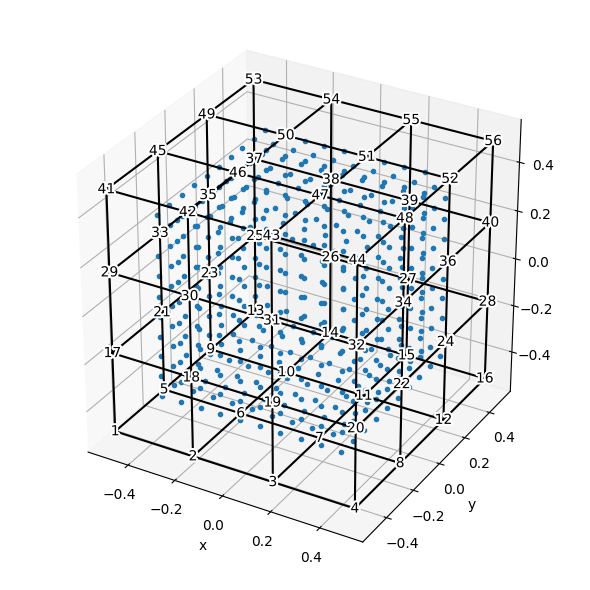

(-0.55, 0.55)

In [5]:
figure(figsize = (6, 6))
plot_system(g, vertex_positions, poi)

The goal field is defined as a function of space `x` (an array of size 3 - x, y and z), returning an array of size 3 - the x, y and z components of the field.

In [6]:
Bgoal(x) = [0, 100e-6, 0]

Bgoal (generic function with 1 method)

Next, the graph is analysed to find `cells` (or *tiles*) - smallest loops to be found in the graph. Each will be treated as a *tile coil*.

In [7]:
cells = find_cells(g)

54-element Array{Any,1}:
 [1, 2, 6, 5, 1]     
 [1, 2, 18, 17, 1]   
 [1, 5, 21, 17, 1]   
 [2, 3, 7, 6, 2]     
 [2, 3, 19, 18, 2]   
 [3, 4, 8, 7, 3]     
 [3, 4, 20, 19, 3]   
 [4, 8, 22, 20, 4]   
 [5, 6, 10, 9, 5]    
 [5, 9, 23, 21, 5]   
 [6, 7, 11, 10, 6]   
 [7, 8, 12, 11, 7]   
 [8, 12, 24, 22, 8]  
 ⋮                   
 [37, 38, 54, 53, 37]
 [38, 39, 55, 54, 38]
 [39, 40, 56, 55, 39]
 [41, 42, 46, 45, 41]
 [42, 43, 47, 46, 42]
 [43, 44, 48, 47, 43]
 [45, 46, 50, 49, 45]
 [46, 47, 51, 50, 46]
 [47, 48, 52, 51, 47]
 [49, 50, 54, 53, 49]
 [50, 51, 55, 54, 50]
 [51, 52, 56, 55, 51]

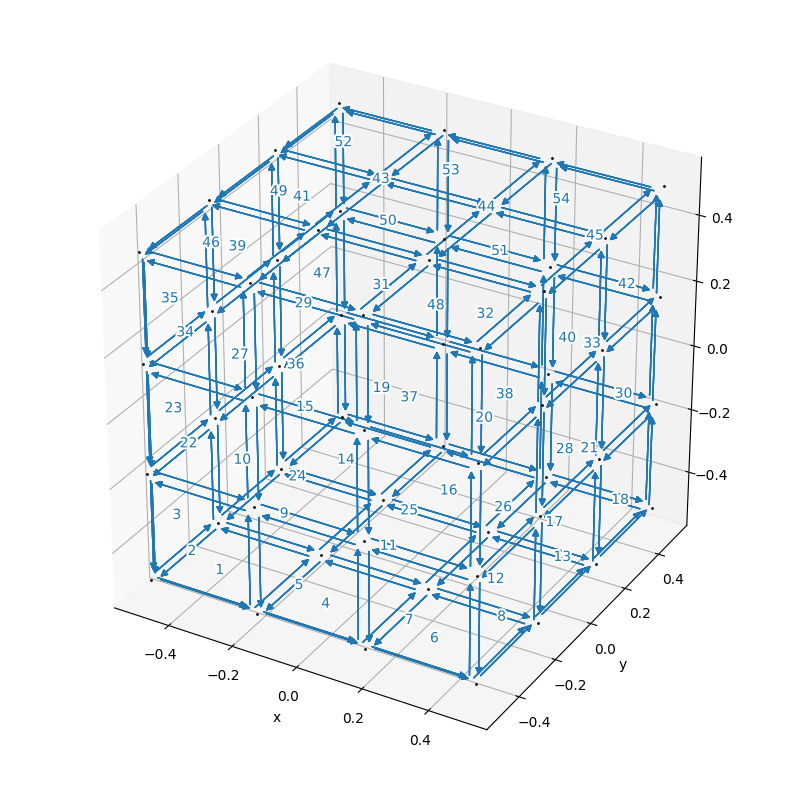

In [8]:
figure(figsize = (8, 8))
plot_vertices(vertex_positions, labels = false)
plot_cells(cells, vertex_positions)

Now the matrix of the system is calculated. It is a matrix of proportionality constants between the current in each cell (columns) and the magnetic field in each of the points of interest, in each direction (rows). It is calculated using the Biot-Savart law.

In [9]:
M = system_matrix(poi, vertex_positions, cells)

1464×54 Array{Float64,2}:
 -3.01209e-7   3.01209e-7   1.8543e-6    …   4.58295e-9    4.95946e-9
 -3.01209e-7  -1.8543e-6   -3.01209e-7       8.66244e-9    4.95946e-9
  1.8543e-6    3.01209e-7  -3.01209e-7       4.38976e-9    1.53765e-9
  3.01209e-7  -3.01209e-7   9.34057e-7       3.92817e-9    5.1309e-9 
 -3.01209e-7  -1.8543e-6   -1.58914e-7       9.54808e-9    5.81575e-9
  1.8543e-6    3.01209e-7  -1.58914e-7   …   5.12795e-9    2.15478e-9
  9.90422e-7  -9.90422e-7   4.97031e-7       3.02508e-9    5.15446e-9
 -2.35337e-7  -1.39783e-6  -7.62862e-8       1.02959e-8    6.74236e-9
  1.39783e-6   2.35337e-7  -7.62862e-8       5.76366e-9    2.85513e-9
  1.04263e-6  -1.04263e-6   2.85092e-7       1.91067e-9    4.98457e-9
 -1.28118e-7  -3.22844e-7  -3.82384e-8   …   1.08398e-8    7.70703e-9
  3.22844e-7   1.28118e-7  -3.82384e-8       6.2324e-9     3.61371e-9
  4.99601e-7  -4.99601e-7   1.75136e-7       6.53692e-10   4.58295e-9
  ⋮                                      ⋱                      

We evaluate the goal magnetic field in each of the points of interest.

In [10]:
Bpoi = vcat(Bgoal.(poi)...)

1464-element Array{Float64,1}:
 0.0   
 0.0001
 0.0   
 0.0   
 0.0001
 0.0   
 0.0   
 0.0001
 0.0   
 0.0   
 0.0001
 0.0   
 0.0   
 ⋮     
 0.0   
 0.0001
 0.0   
 0.0   
 0.0001
 0.0   
 0.0   
 0.0001
 0.0   
 0.0   
 0.0001
 0.0   

Now the system is solved. We look for optimal currents in each of the tile coils, that will reproduce the goal magnetic field in the points of interest best. It is a linear least-squares problem.

In [11]:
optI = M \ Bpoi

54-element Array{Float64,1}:
  27.6977     
 -73.5683     
  27.6977     
  28.0449     
 -74.9407     
  27.6977     
 -73.5683     
 -27.6977     
   8.16768e-15
  -4.8943e-15 
  -2.32591e-15
  -1.7496e-14 
   4.2403e-15 
   ⋮          
 -73.5683     
 -74.9407     
 -73.5683     
 -27.6977     
 -28.0449     
 -27.6977     
   1.23049e-15
  -4.66294e-15
  -1.9735e-15 
  27.6977     
  28.0449     
  27.6977     

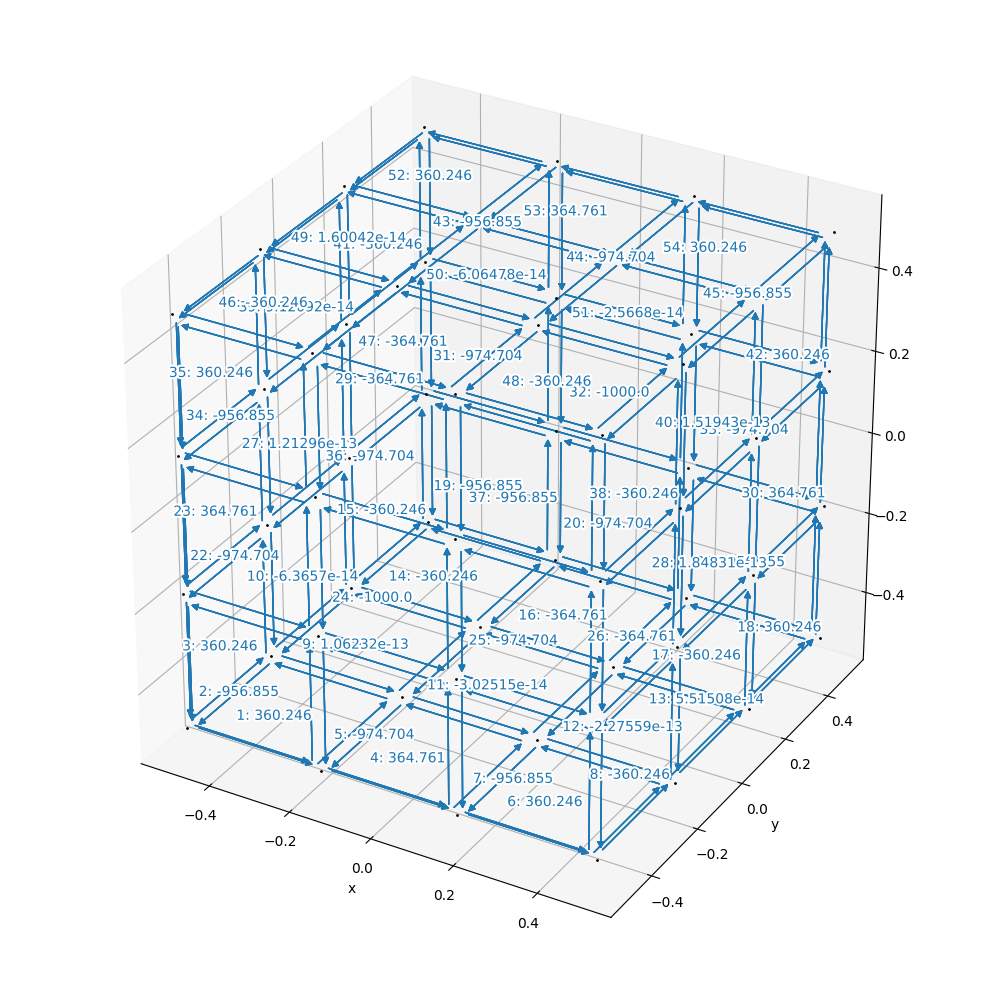

In [12]:
figure(figsize = (10, 10))
plot_vertices(vertex_positions, labels = false)
current_norm = 1000 / maximum(abs, optI)
plot_cells(cells, vertex_positions, optI * current_norm)

We proceed to simplify the system. The first step is for each edge to to add the currents of the adjacent tiles. We get the net current flowing along each edge.

In [13]:
edgecurrents = find_edgecurrents(g, cells, optI)

Dict{LightGraphs.SimpleGraphs.SimpleEdge{Int64},Float64} with 108 entries:
  Edge 37 => 53 => 45.8706
  Edge 32 => 34 => 0.34717
  Edge 2 => 6   => -0.34717
  Edge 15 => 27 => -1.37236
  Edge 14 => 26 => 1.37236
  Edge 3 => 7   => 0.34717
  Edge 43 => 47 => -0.34717
  Edge 12 => 24 => -27.6977
  Edge 7 => 8   => -27.6977
  Edge 19 => 20 => -1.37236
  Edge 29 => 41 => 45.8706
  Edge 6 => 7   => -28.0449
  Edge 50 => 54 => -0.34717
  Edge 48 => 52 => -1.36557e-14
  Edge 46 => 47 => 28.0449
  Edge 31 => 32 => 1.37236
  Edge 24 => 28 => 0.34717
  Edge 27 => 28 => -1.37236
  Edge 39 => 40 => 1.37236
  Edge 14 => 15 => -46.8958
  Edge 49 => 53 => 2.13163e-14
  Edge 29 => 30 => 1.37236
  Edge 26 => 38 => 1.94488
  Edge 17 => 29 => 46.8958
  Edge 22 => 34 => -28.0449
  ⋮             => ⋮

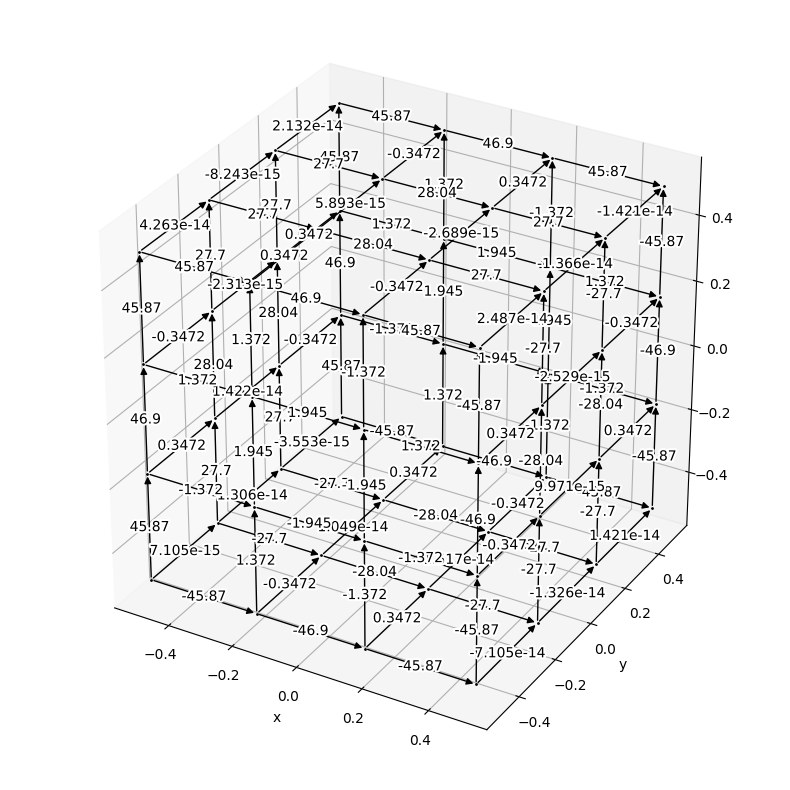

In [14]:
figure(figsize = (8, 8))
plot_vertices(vertex_positions, labels = false)
plot_edge_currents(g, edgecurrents, vertex_positions)

The result is a complicated net of current. We decompose the net into what we call *simple loops*.

In [15]:
simpleloops, simpleloopscurrents = find_all_simpleloops(g, edgecurrents)

(Any[[1, 17, 29, 41, 42, 43, 44, 32, 20, 4, 3, 2, 1], [13, 25, 37, 53, 54, 55, 56, 40, 28, 16, 15, 14, 13], [5, 21, 33, 45, 46, 47, 48, 34, 22, 8, 7, 6, 5], [9, 23, 35, 49, 50, 51, 52, 36, 24, 12, 11, 10, 9], [18, 30, 31, 19, 18], [26, 38, 39, 27, 26], [2, 18, 17, 29, 30, 42, 43, 31, 32, 20, 19, 3, 2], [14, 26, 25, 37, 38, 54, 55, 39, 40, 28, 27, 15, 14], [2, 18, 17, 21, 33, 29, 30, 42, 46, 47  …  31, 32, 34, 22, 20, 19, 3, 7, 6, 2], [10, 14, 26, 25, 23, 35, 37, 38, 54, 50  …  55, 39, 40, 36, 24, 28, 27, 15, 11, 10]], Any[45.8706, 45.8706, 27.6977, 27.6977, 1.94488, 1.94488, 1.02519, 1.02519, 0.34717, 0.34717])

Now we plot the simple loops, together with the corresponding currents.

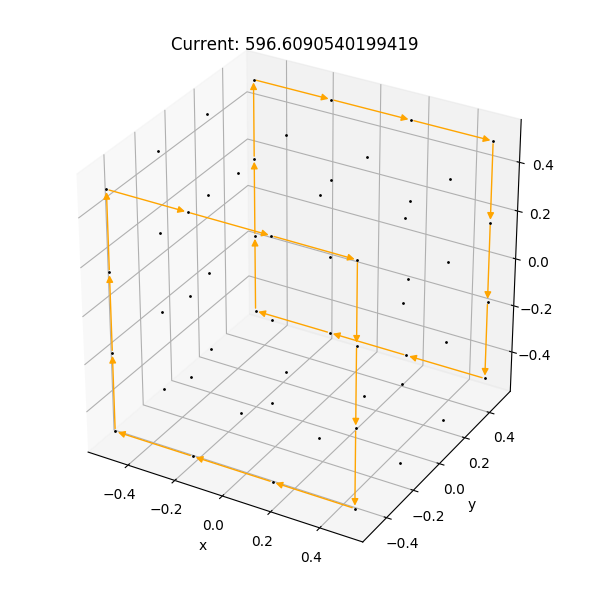

PyObject <matplotlib.text.Text object at 0x12bbdb080>

In [16]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
plot_loop(simpleloops[1], vertex_positions, color = "orange")
plot_loop(simpleloops[2], vertex_positions, color = "orange")
title("Current: $(simpleloopscurrents[1] * current_norm)")

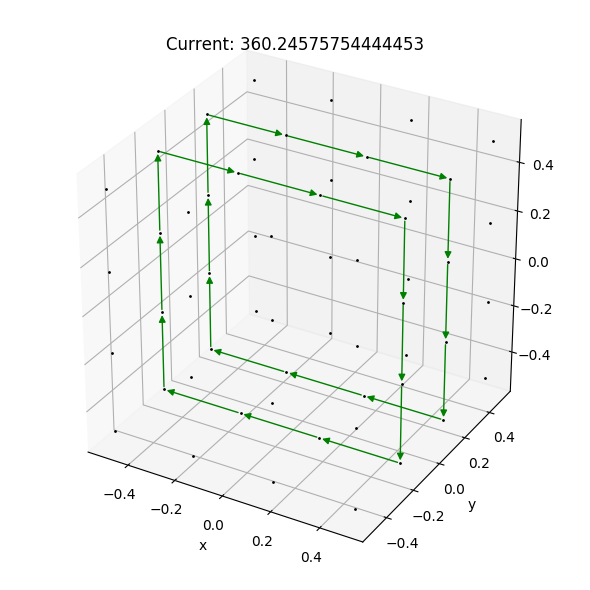

PyObject <matplotlib.text.Text object at 0x126bec2e8>

In [17]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
plot_loop(simpleloops[3], vertex_positions, color = "green")
plot_loop(simpleloops[4], vertex_positions, color = "green")
title("Current: $(simpleloopscurrents[3] * current_norm)")

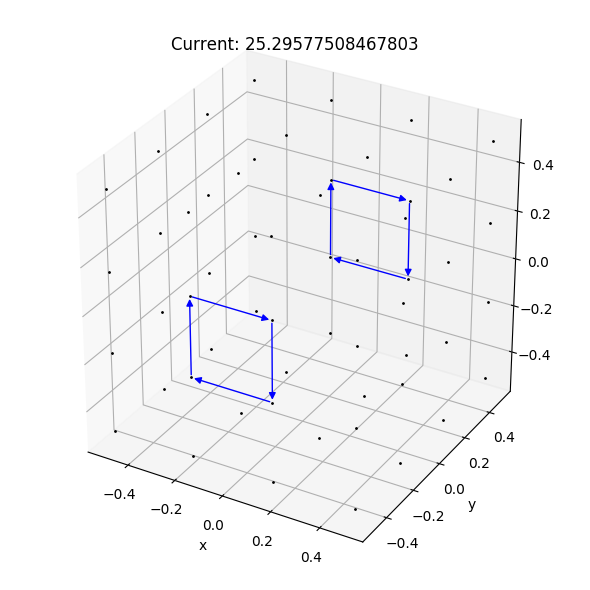

PyObject <matplotlib.text.Text object at 0x12ba3bb38>

In [18]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
plot_loop(simpleloops[5], vertex_positions, color = "blue")
plot_loop(simpleloops[6], vertex_positions, color = "blue")
title("Current: $(simpleloopscurrents[5] * current_norm)")

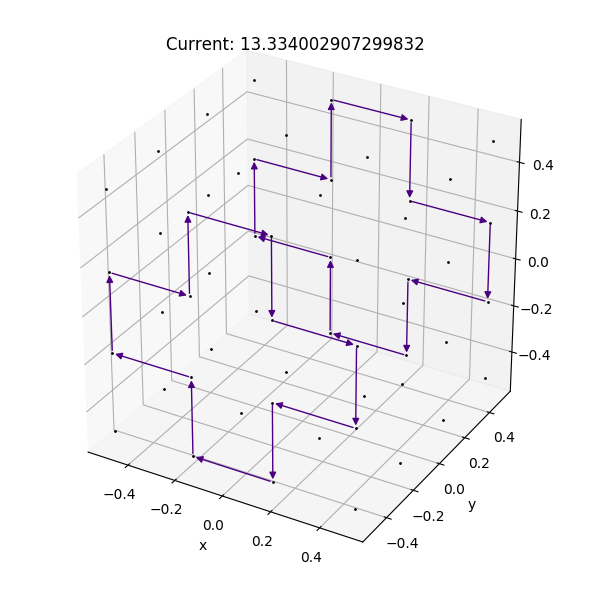

PyObject <matplotlib.text.Text object at 0x126772710>

In [19]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
plot_loop(simpleloops[7], vertex_positions, color = "indigo")
plot_loop(simpleloops[8], vertex_positions, color = "indigo")
title("Current: $(simpleloopscurrents[7] * current_norm)")

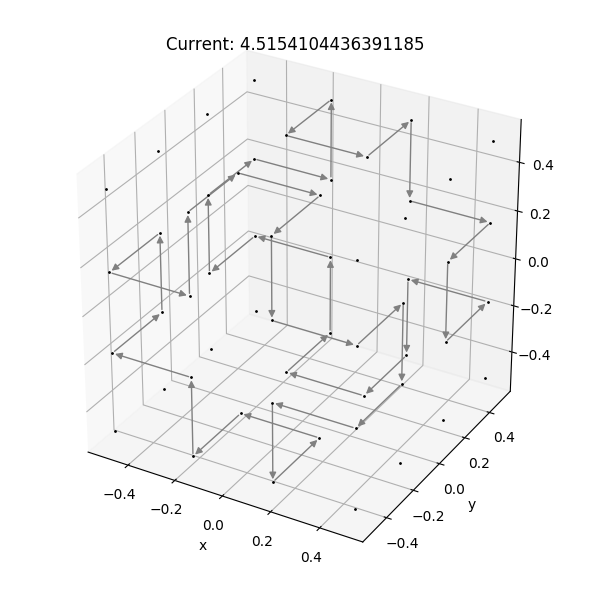

PyObject <matplotlib.text.Text object at 0x126b0acc0>

In [20]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
plot_loop(simpleloops[9], vertex_positions, color = "grey")
plot_loop(simpleloops[10], vertex_positions, color = "grey")
title("Current: $(simpleloopscurrents[9] * current_norm)")

We can characterise the performance of the design. For example by plotting the histogram of the difference of the goal field and the one generated with the design.

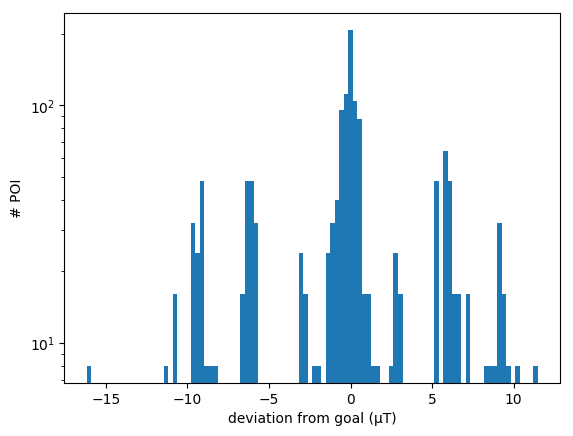

PyObject <matplotlib.text.Text object at 0x12747c4a8>

In [21]:
plot_deviation_histogram(poi, simpleloops, simpleloopscurrents, vertex_positions, Bgoal)

Or we can plot the map of the difference between the goal field an the one produced by the system.

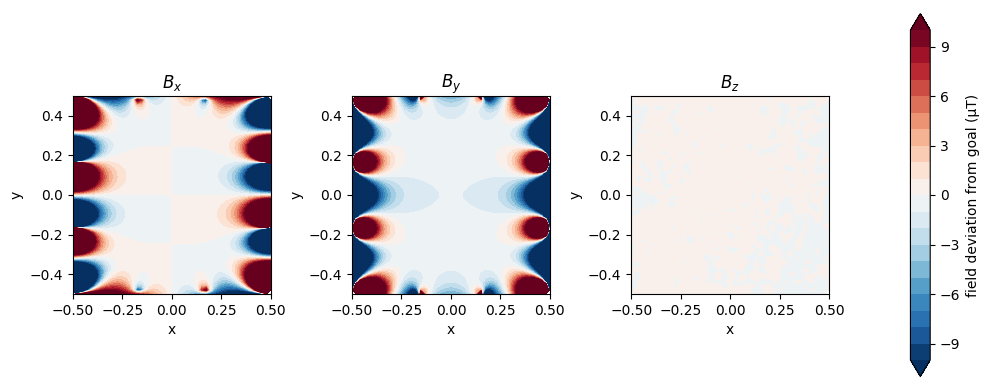

In [22]:
plot_loops_field(cells, optI, vertex_positions, [1, 2, 3], 0;
        n = 50, spanA = [-0.5, 0.5], spanB = [-0.5, 0.5], Bref = Bgoal, levels = linspace(-10, 10, 21))

# A more complicated example 

The magnetic field can be decomposed into linearly independent carthesian harmotic polynomials. Below are the polynomials up to the first order:

n = 1: $\quad P^x_1(\mathbf{r}) = 1 \quad P^y_1(\mathbf{r}) = 0 \quad P^z_1(\mathbf{r}) = 0$

n = 2: $\quad P^x_2(\mathbf{r}) = 0 \quad P^y_2(\mathbf{r}) = 1 \quad P^z_2(\mathbf{r}) = 0$

n = 3: $\quad P^x_3(\mathbf{r}) = 0 \quad P^y_3(\mathbf{r}) = 0 \quad P^z_3(\mathbf{r}) = 1$

n = 4: $\quad P^x_4(\mathbf{r}) = x \quad P^y_4(\mathbf{r}) = 0 \quad P^z_4(\mathbf{r}) = -z$

n = 5: $\quad P^x_5(\mathbf{r}) = y \quad P^y_5(\mathbf{r}) = x \quad P^z_5(\mathbf{r}) = 0$

n = 6: $\quad P^x_6(\mathbf{r}) = 0 \quad P^y_6(\mathbf{r}) = y \quad P^z_6(\mathbf{r}) = -z$

n = 7: $\quad P^x_7(\mathbf{r}) = z \quad P^y_7(\mathbf{r}) = 0 \quad P^z_7(\mathbf{r}) = x$

n = 8: $\quad P^x_8(\mathbf{r}) = 0 \quad P^y_8(\mathbf{r}) = z \quad P^z_8(\mathbf{r}) = -y$

We will design a $n=5$ gradient coil on a system that is extended in the $y$ direction and has two large openings.

We will also assume that we will be using wires with 10A, 1A and 0.1A to construct the coil.

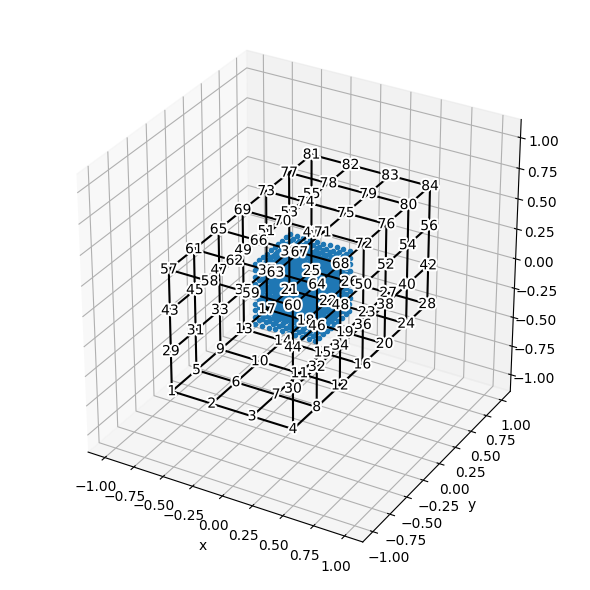

(-1.1, 1.1)

In [23]:
g, vertex_positions = cuboid_system([1, 2, 1], [3, 6, 3],
    skipfaces = [false, false, true, true, false, false])
poi = cuboid_poi([0.5, 0.5, 0.5], [0.0, 0.0, 0.0], [10, 10, 10], filled = true)

# the wires used to construct the coil
elemcurrents = [10.0, 1.0, 0.1]

figure(figsize = (6, 6))
plot_system(g, vertex_positions, poi)

When there are large openings it takes a long time to find the cells automatically. It can be speeded up by providing the large cells manually.

In [24]:
# Find out the location of the openings
extrema(getindex.(vertex_positions, 2))

(-1.0, 1.0)

In [25]:
# prepare the large cells 
front_face_unordered = [ i for i in eachindex(vertex_positions) if vertex_positions[i][2] < -0.9 ]
front_face = order_cell(g, front_face_unordered)
            
back_face_unordered = [ i for i in eachindex(vertex_positions) if vertex_positions[i][2] > 0.9 ]
back_face = order_cell(g, back_face_unordered)
                        
initialcells = [front_face, back_face]

2-element Array{Array{Int64,1},1}:
 [1, 2, 3, 4, 30, 44, 60, 59, 58, 57, 43, 29, 1]     
 [25, 26, 27, 28, 42, 56, 84, 83, 82, 81, 55, 41, 25]

The goal field is a gradient coil, n = 5: $\quad P^x_5(\mathbf{r}) = y \quad P^y_5(\mathbf{r}) = x \quad P^z_5(\mathbf{r}) = 0$, magnitude is 100 μT/m.

In [26]:
Bgoal(x) = [√2 * 100e-6 * x[2], √2 * 100e-6 * x[1], 0]

Bgoal (generic function with 1 method)

We will use the `solve_system` function, which performs the whole design.

In [27]:
simpleloops, simpleloopscurrents = solve_system(g, vertex_positions, poi, Bgoal,
    verbose = true, initialcells = [front_face, back_face],
    mincurrent = minimum(elemcurrents) / 2)

Looking for cells in the graph...
Calculating the system's matrix...
Solving for currents in the cells...
Finding the total currents along the edges...
Decomposing the solution into simple loops...


(Any[[1, 5, 31, 29, 1], [4, 8, 32, 30, 4], [21, 39, 41, 25, 21], [24, 40, 42, 28, 24], [43, 45, 61, 57, 43], [44, 46, 64, 60, 44], [53, 77, 81, 55, 53], [54, 80, 84, 56, 54], [1, 5, 6, 2, 1], [3, 4, 8, 7, 3]  …  [9, 13, 14, 18, 22, 26, 25, 21, 39, 41  …  81, 82, 78, 74, 70, 69, 65, 47, 33, 9], [12, 16, 15, 19, 23, 27, 28, 24, 40, 42  …  84, 83, 79, 75, 71, 72, 68, 48, 34, 12], [13, 14, 18, 22, 26, 25, 21, 39, 41, 55  …  82, 78, 74, 70, 69, 73, 51, 37, 17, 13], [15, 19, 23, 27, 28, 24, 40, 42, 56, 54  …  79, 75, 71, 72, 76, 52, 38, 20, 16, 15], [29, 43, 45, 47, 33, 31, 29], [30, 44, 46, 48, 34, 32, 30], [37, 39, 41, 55, 53, 51, 37], [38, 40, 42, 56, 54, 52, 38], [13, 14, 18, 22, 26, 25, 21, 39, 41, 55  …  77, 81, 82, 78, 74, 70, 69, 49, 35, 13], [15, 19, 23, 27, 28, 24, 40, 42, 56, 54  …  84, 83, 79, 75, 71, 72, 50, 36, 16, 15]], Any[728.547, 728.547, 728.547, 728.547, 728.547, 728.547, 728.547, 728.547, 622.42, 622.42  …  3.31922, 3.31922, 3.31922, 3.31922, 2.75133, 2.75133, 2.75133, 2

We decompose the solution into the currents that we want to build. We also calculate the real currents that will be flowing in the simpleloops, when they are constructed out of 10A, 1A and 0.1A wires.

In [28]:
simpleloopscurrents_decomp = decompose_currents(simpleloopscurrents, elemcurrents)
simpleloopscurrents_real = real_decomposed_currents(simpleloopscurrents_decomp, elemcurrents)

48-element Array{Float64,1}:
 728.5
 728.5
 728.5
 728.5
 728.5
 728.5
 728.5
 728.5
 622.4
 622.4
 622.4
 622.4
 622.4
   ⋮  
   3.6
   3.6
   3.3
   3.3
   3.3
   3.3
   2.8
   2.8
   2.8
   2.8
   0.6
   0.6

We calculate the performance of the system build using the 10A, 1A and 0.1A wires.

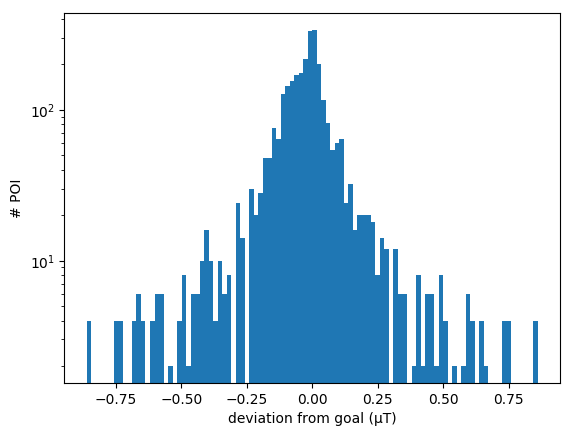

PyObject <matplotlib.text.Text object at 0x1266f52e8>

In [29]:
plot_deviation_histogram(poi, simpleloops, simpleloopscurrents_real, vertex_positions, Bgoal)

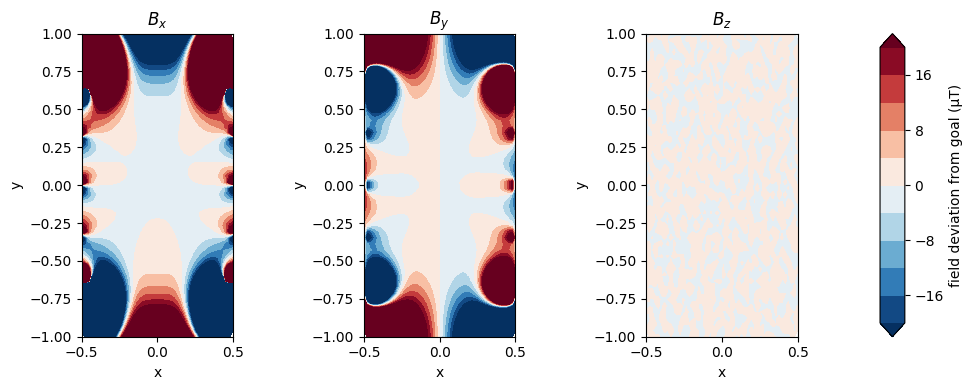

In [30]:
plot_loops_field(simpleloops, simpleloopscurrents_real, vertex_positions, [1, 2, 3], 0;
        n = 50, spanA = [-0.5, 0.5], spanB = [-1, 1], Bref = Bgoal, levels = linspace(-20, 20, 11))

When we do not supply the reference field, we can plot the field of the coild.

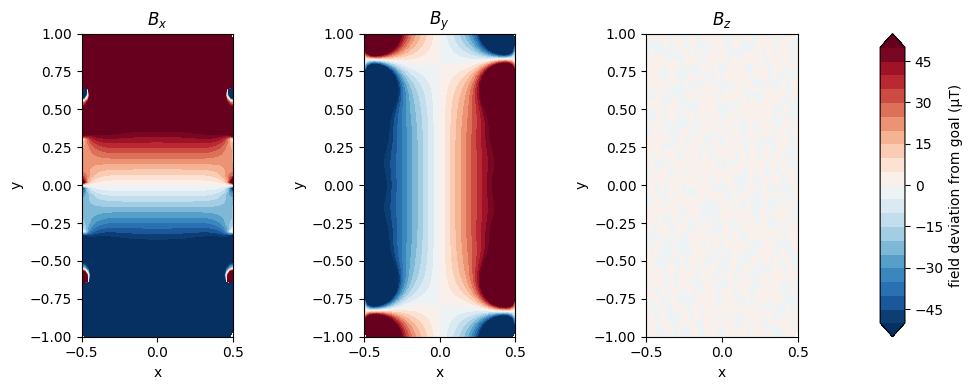

In [31]:
plot_loops_field(simpleloops, simpleloopscurrents_real, vertex_positions, [1, 2, 3], 0;
        n = 50, spanA = [-0.5, 0.5], spanB = [-1, 1],levels = linspace(-50, 50, 21))

We print the decomposition of all the currents in the simple loops to the currents we want to use in the wires:

In [32]:
for i in eachindex(simpleloopscurrents)
    print("#$i: ")
    print("$(lpad(simpleloopscurrents[i], 20)) = ")
    print("$(lpad(simpleloopscurrents_decomp[i][1], 2)) * 10A  +  ")
    print("$(simpleloopscurrents_decomp[i][2]) * 1A  +  ")
    println("$(simpleloopscurrents_decomp[i][3]) * 0.1A")
end

#1:    728.5474826024822 = 72 * 10A  +  8 * 1A  +  5 * 0.1A
#2:    728.5474826022922 = 72 * 10A  +  8 * 1A  +  5 * 0.1A
#3:    728.5474826022881 = 72 * 10A  +  8 * 1A  +  5 * 0.1A
#4:    728.5474826022881 = 72 * 10A  +  8 * 1A  +  5 * 0.1A
#5:    728.5474826022861 = 72 * 10A  +  8 * 1A  +  5 * 0.1A
#6:    728.5474826022559 = 72 * 10A  +  8 * 1A  +  5 * 0.1A
#7:    728.5474826022494 = 72 * 10A  +  8 * 1A  +  5 * 0.1A
#8:    728.5474826022389 = 72 * 10A  +  8 * 1A  +  5 * 0.1A
#9:    622.4204080423677 = 62 * 10A  +  2 * 1A  +  4 * 0.1A
#10:     622.420408042207 = 62 * 10A  +  2 * 1A  +  4 * 0.1A
#11:     622.420408042207 = 62 * 10A  +  2 * 1A  +  4 * 0.1A
#12:     622.420408042207 = 62 * 10A  +  2 * 1A  +  4 * 0.1A
#13:    622.4204080421667 = 62 * 10A  +  2 * 1A  +  4 * 0.1A
#14:    622.4204080421667 = 62 * 10A  +  2 * 1A  +  4 * 0.1A
#15:    622.4204080421662 = 62 * 10A  +  2 * 1A  +  4 * 0.1A
#16:    622.4204080421522 = 62 * 10A  +  2 * 1A  +  4 * 0.1A
#17:    268.8132969810129 = 26 * 

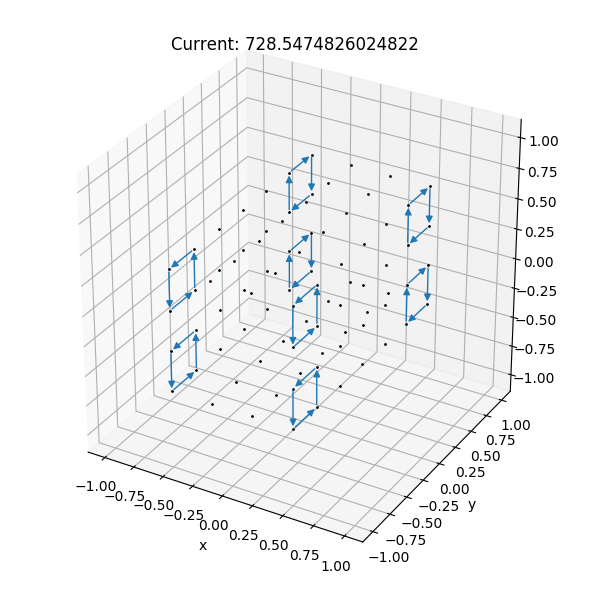

PyObject <matplotlib.text.Text object at 0x126cba198>

In [33]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
for i in 1:8
    plot_loop(simpleloops[i], vertex_positions, color = "C0")
end
title("Current: $(simpleloopscurrents[1])")

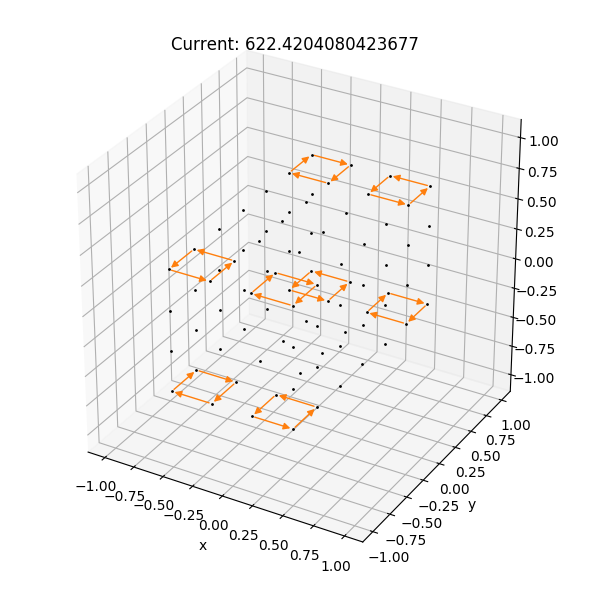

PyObject <matplotlib.text.Text object at 0x1263995c0>

In [34]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
for i in 9:16
    plot_loop(simpleloops[i], vertex_positions, color = "C1")
end
title("Current: $(simpleloopscurrents[9])")

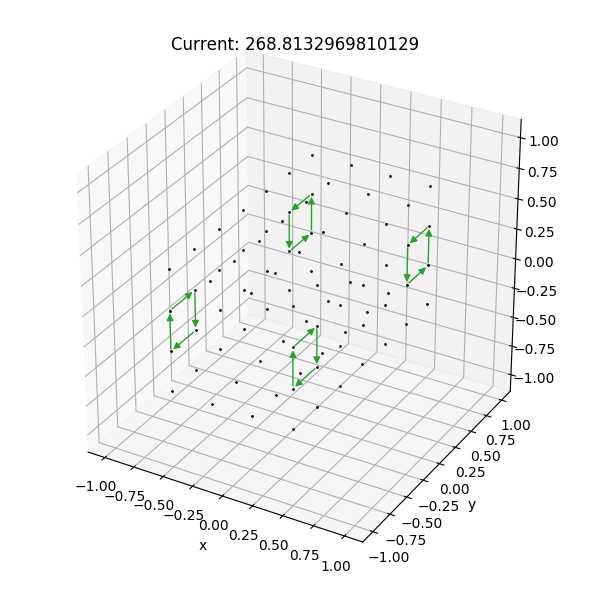

PyObject <matplotlib.text.Text object at 0x126fb5d30>

In [35]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
for i in 17:20
    plot_loop(simpleloops[i], vertex_positions, color = "C2")
end
title("Current: $(simpleloopscurrents[17])")

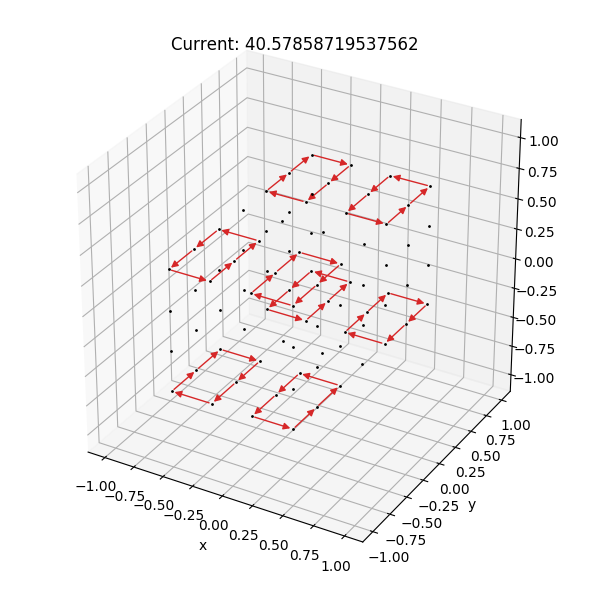

PyObject <matplotlib.text.Text object at 0x126c0d198>

In [36]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
for i in 21:28
    plot_loop(simpleloops[i], vertex_positions, color = "C3")
end
title("Current: $(simpleloopscurrents[21])")

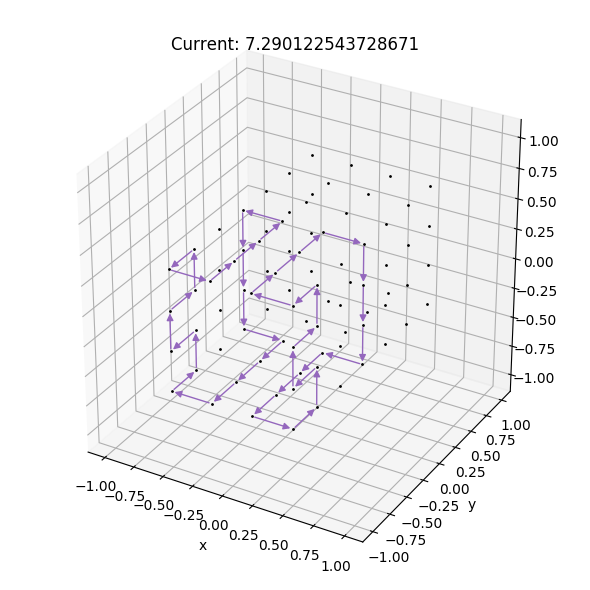

PyObject <matplotlib.text.Text object at 0x12c62ce80>

In [37]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
for i in 29:30
    plot_loop(simpleloops[i], vertex_positions, color = "C4")
end
title("Current: $(simpleloopscurrents[29])")

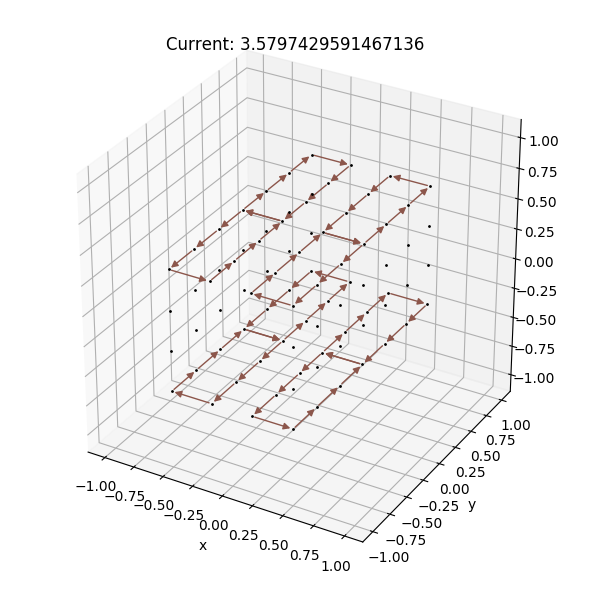

PyObject <matplotlib.text.Text object at 0x126d2dc18>

In [38]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
for i in 31:38
    plot_loop(simpleloops[i], vertex_positions, color = "C5")
end
title("Current: $(simpleloopscurrents[31])")

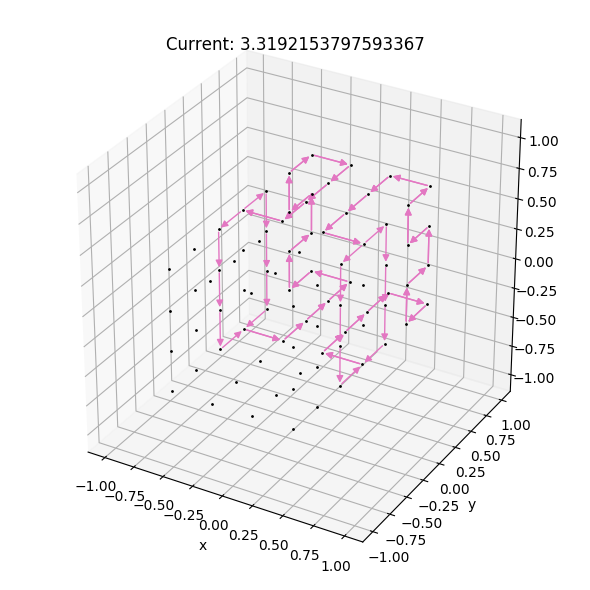

PyObject <matplotlib.text.Text object at 0x12e1c2ba8>

In [39]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
for i in 39:42
    plot_loop(simpleloops[i], vertex_positions, color = "C6")
end
title("Current: $(simpleloopscurrents[39])")

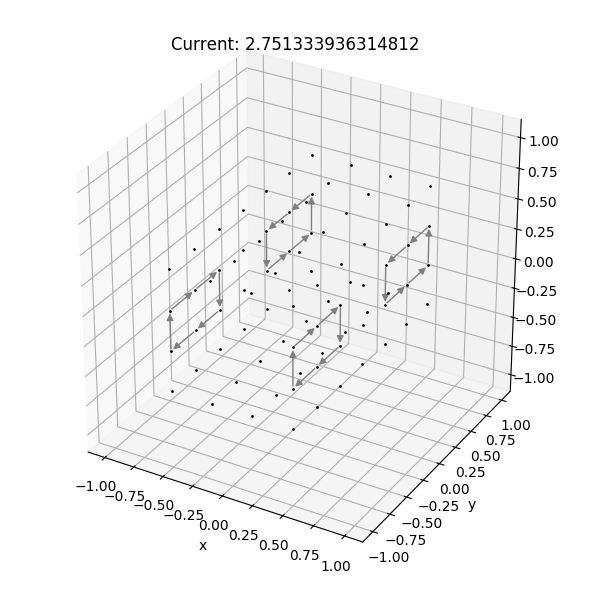

PyObject <matplotlib.text.Text object at 0x12e587518>

In [40]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
for i in 43:46
    plot_loop(simpleloops[i], vertex_positions, color = "C7")
end
title("Current: $(simpleloopscurrents[43])")

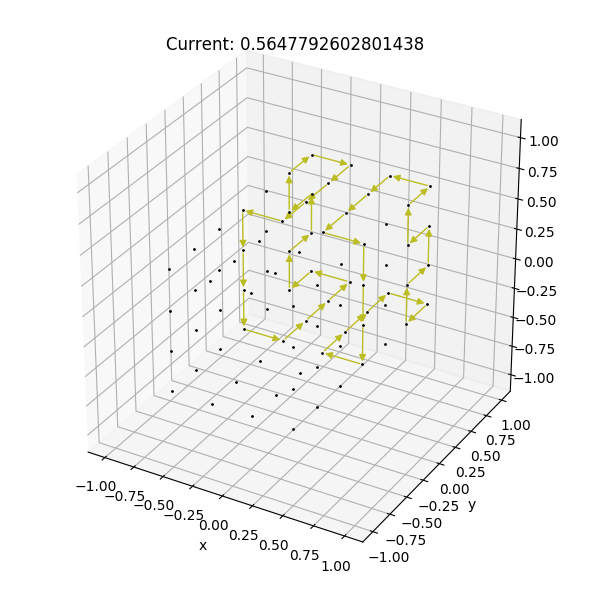

PyObject <matplotlib.text.Text object at 0x12e9a6a58>

In [41]:
figure(figsize = (6, 6))
plot_vertices(vertex_positions, labels = false)
for i in 47:48
    plot_loop(simpleloops[i], vertex_positions, color = "C8")
end
title("Current: $(simpleloopscurrents[47])")